# Introduction to reinforcement learning
Joe Bayley - joseph.bayley@glasgow.ac.uk

Reinforcement Learning is the third paradigm of machine learning, there is supervised, unsupervised and reinforcement learning. 

<img src="ML_summary.png" width="900"/>

What makes reinforcement learning different:
 - There is no supervision, nothing to tell it what action was best, just a reward signal
 - Feedback is delayed - the information it gets about an action will only come much later after a series of actions
 - Data is not iid, what an agent does at each step in time is highly correlated to the previous steps. 
 - Agent takes actions to influence its environment


There are some other great training resources around for reinforcement learning, I'll list a few here
 - Great intro course from David Silver (AlphaGo etc) - https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ
 - Intro notes - Sutton and Barto - https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf
 - Open AI spinning up documentation - https://spinningup.openai.com/en/latest/index.html



# Key concepts/Terminology

---

<h3 style="text-align: center"> Environment and Agent</h3>

The environment describes the world in the agent operates.  This is usually defined as a markov process, where each node is a state and the edge is an action which leads to a new state(node)

---

<h3 style="text-align: center"> States and observations</h3>

symbols -> $S_i, O_i$

The state refers to the conditions of the environment at a given time, so where a cart is what angle the pole is at etc. \
The observations are how the agenst sees the state, this could be a complete observations of the state itself, or could be only some elements of the state. 

---
<h3 style="text-align: center"> Actions</h3>

symbols -> $a_i$

The actions define the choices that an agent can make within an enironment. These actions can be discrete e.g. the cart can move left or right or continuous the cart moves left with some velocity.

---

<h3 style="text-align: center"> Policy </h3>

symbols -> $\pi(\theta)$

The policy defines how an agent behaves at any time. It is approximately mapping the states(observations) to actions. For example a policy that always moves left might be a bad choice as it does not result in the answer that is desired. This policy can be deterministic, or can be probabalistic, this usually depends on the types of actions and type of environment. More often than not this is where a neural network comes in which can map the current state of the environment to the best possible action.

---

<h3 style="text-align: center"> Reward and Return</h3>

symbols -> $r_i, R$

The reward function defines the goal in RL. This is the information that the environment feeds back to the agent and the agent wants to maximise the total reward in the long run (also known as the return).

Rewards can be stochastic values as they depend on the state of the environment.

We can also define the return here which is the total return over the whole episode (1 game, 1 life etc).

$$
R = \sum_{i=0}^{T} r_i
$$


---

<h3 style="text-align: center"> Value function </h3>

symbols -> $V(S_i)$

Rewards give information on what is good immediately after taking an actions, whereas the value function looks at what is good over the long term. It returns the total amount of reward you could expect over the future if we started at the state $S_i$.

We generally seek out actions that give high values rather than high rewards, as we know it is likely to give us a greater reward in the future.

---

<h3 style="text-align: center"> Model </h3>

The model refers to a model of the environment. This is an optional part. The model might take in the current state and an action and try to predict the next environment state and reward. These can be used for "planning", where the actions can be decided based on this model before it actually experiences those states. 

---

## General goal

**The general goal of all this is to update your policy to maximise the reward that you get.**

The loop that you would follow is:

 - There is and Agent in some environment that will take actions following some policy. 
 - The Agent will take some action. 
 - The Environment may change based on that action and return a new state and obersvation. 
 - The Agent will take another action based on the observation of the state.


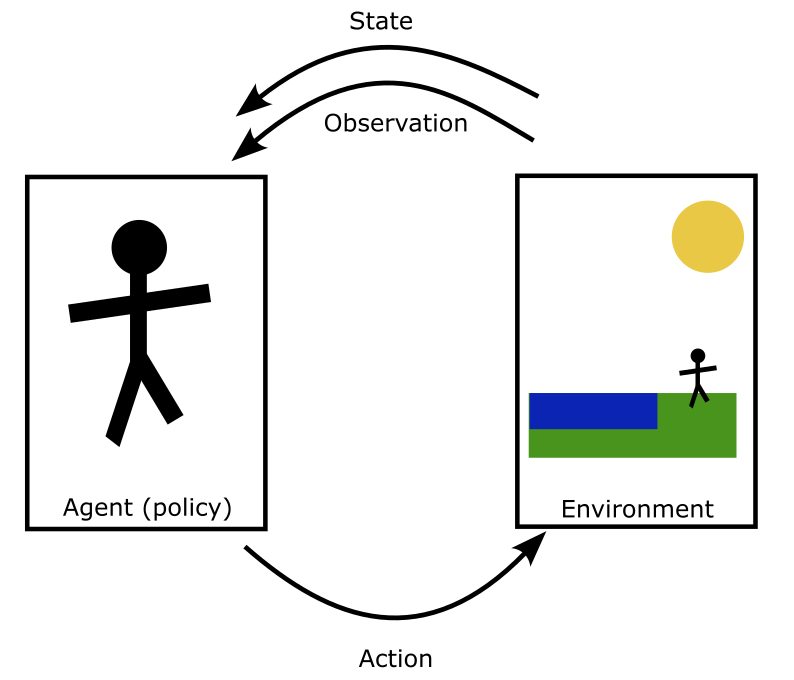

## Markov decision process

Reinforcement learning problems are usually thought of as markov decision processes, where each state only depends on the previous state. 
$$
P[S_{t+1} | S_t] = P[S_{t+1}| S_1, ... S_t]
$$
Almost all problems can be expressed as a markov decision process.

We can make this tutorial as an mdp 


<img src="tutorial_mdp.png" width="800"/>

We can also write out what reward we would gain by taking each action (this is something that would come back from the environment).

<img src="tutorial_mdp_return.png" width="800"/>

The return is then the total (discounted) reward from some time step t:

$$
G_t = R_{t+1} + \gamma R_{t+2} + ... = \sum_k \gamma^k R_{t+k+1}
$$

The discount factor is a way to control the return and prevent it being an infinite sum. It tells you how much you care now about what happens in the future ( do you prefer reward now or in the future).

If we come back to the Value function, we can compute the value of being in some state $s_t$ as being the expected value of the return from that state,

$$
\begin{aligned}
V(s) &= \mathop{\mathbb{E}} \left[ G_t | S_t = s\right] \\
  &= \mathop{\mathbb{E}} \left[ R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ...| S_t = s \right] \\
   &= \mathop{\mathbb{E}} \left[ R_{t+1} + \gamma \left(R_{t+2} + \gamma R_{t+3} + ...\right) | S_t = s \right] \\
 &= \mathop{\mathbb{E}} \left[ R_{t+1} + \gamma G_t | S_t = s \right] \\
  &= \mathop{\mathbb{E}} \left[ R_{t+1} + \gamma V(S_{t+1}) | S_t = s \right] \\

\end{aligned}
$$

This is the Bellman equation, which says that the expected return that I will get is the immediate reward plus the discounted return that I would get from the next time step. 

Above we have just taken random actions, where each actions has some probability associated with it. However we want to make choices here, we want to choose an action that will maximise out return.

To do this we need a policy, this defined the probability of taking an action in a given state.

$$
\pi(a | s) = P\left[A_t = a | S_t = s\right]
$$

We can change this policy to whatever we want, with with the same goal of maximising the return we get by following that policy from now onwards.

The value function above changes slightly as we will be following some policy $'pi$, 

$$
v_{\pi}(s) = \mathop{\mathbb{E}}_{\pi}\left[G_t | S_t = s \right]
$$

We can also write down an action-value function which depends on the action, as the different actions will give a different return. 
The Bellman equation for this is then

$$
Q_{\pi}(s, a) =  \mathop{\mathbb{E}}_{\pi} \left[G_t | S_t = s, A_t = a \right] \\
$$

For any markov decision process, there is an optimal policy $\pi_{*}$ which is better than or equal to all other policies. All optimal policies will give the optimal value functions: 
$V_{\pi_*}(s) = V_*(s)$ \
$Q_{\pi_*}(s, a) = Q_*(s, a)$

So what we want to do is try to find one of these optimal policies, however there is no closed form solution to the Bellman equations described about. Generally these are solved iteratively. (There is not necessarily any Neural networks introduced at this stage.)

## Grid world

We can start with a simple grid world where the goal is to move to the star in the image. 

<img src="grid_world.png" width="500"/>


This can be written out as a markov process, where as its a simple case we could work out each of the transition probabilities individually.

We could compute the value of being in any of the positions (or state) as the distance from the goal point

<img src="grid_world_value2.png" width="500"/>

From this set of values we could work out the optimal policy by taking the direction which moves closer to the goal, i.e. reduces the value. The red arrows here are our optimal policy. In any given state we know what the best action to take is.

<img src="grid_world_policy.png" width="500"/>

## Different Agents

### Value based
 - Optimise over the value functions
 - This can be done with Dynamic programming and Monte carlo etc 
 - We however, will look at Deep Q learning below

### Policy based
 - Optimise the policy directly
 - Similar to above this can be done with traditional techniques
 - We will focus on policy gradients

### Actor critic
 - combines both the value function and policy to get the best of both worlds.

### Model based
 - We have a model of the environment, then we plan with it by looking ahead to what happens if we follow this model. 
 - We might know all the possible states, or may be able to build a model of the environment. 

### Model free
 - We dont learn a model of the enironment but just look at the policy and/or value function.


## Balancing exploitation and exploration

When our agent is exploring our environment there is a balance to be struck between exploring the environment to see new states and exploiting the knowledge we have gained to follow a good policy.
This is addressed in different ways in the methods above

### Value based
 - In value based methods it is generally solved by choosing to follow the learned policy and selection a random action. i.e. There is some probability that we will take a random action. Generally this probability starts as one and decays over time. Therefore we explore more at the start and follow our policy more towards the end of training.

### Policy based
 - Policy based methods have a exploration step almost built in. As we define the policy directly, we can just sample from that probability distributions, therefore we will get samples from other actions than the most probable natrually.


# Implementing in code


## Environments

We will be using gym to build a model, this is a common library which is used to build environments. Below we will show two different environments.
1. Cartpole - this is a typical environment you will see in tutorials, its balancing a pole on the top of a cart, you can move the cart left or right.
2. Bike ride - I  wrote a custom enviroment about a mountain bike ride so you can see the key components within each function (no promises that this is particularly well written)

In [6]:
# first import a few things
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib
from IPython.display import HTML
import gymnasium as gym
import torch

In [7]:
env = gym.make("CartPole-v1")

We can look at various options within this environment like the number of available actions or what is observed.

In this example there are 4 observations: The angle of the pole, the velocity of the pole, the position of the cart, the velocity of the cart.

In [8]:
env.observation_space.shape

(4,)

There are two actions to take, move right or move left

In [9]:
env.action_space.n

2

We can reset the initial position/velocty of the cart with the reset method.

In [10]:
initial_obs = env.reset()

One other important component to the environment is its ability to take an action and transition to a new state. This is done in the step function 

In [11]:
action = env.action_space.sample()
print(action)

next_obs, reward, done, _, _ = env.step(action)

print("Initial observation")
print(initial_obs[0])
print("Observation after action")
print(next_obs)

1
Initial observation
[ 0.02503772 -0.04292276  0.00168866  0.04386977]
Observation after action
[ 0.02417927  0.15217493  0.00256606 -0.24827988]


## Custom environment

Here I thought it might be useful to write out a custom environment to show what each of the components do. We'll write it out for a simple game here, this is not essential but may be useful to see. 
In this game the bike can move up or down, it has to avoid trees, if it hits one the game is over. If it hits a jump the agents enjoyment goes back to maximum. otherwise the enjoyment decreases by one each time step.

Custom Environment definition:

In [12]:
# these sets of classes make up the position of each of the three available objects in the game
# they just make things a little easier to manage
class Point(object):

    def __init__(self,name, x_min,x_max,y_min,y_max):
        self.name = name
        self.x, self.y = 0, 0
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def move(self, dx, dy):
        self.x += dx
        self.y += dy

        #self.x = np.clip(self.x, self.x_min, self.x_max)
        self.y = np.clip(self.y, self.y_min, self.y_max-1)

class Bike(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Bike, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 1

class Tree(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Tree, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 2
        
class Jump(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Jump, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 3
    

class BikeRide(gym.Env):

    def __init__(self,gridsize=(6,4)):

        # initialise a set of variables 
        self.observation_shape = (3, gridsize[0], gridsize[1])
        self.observation_size = np.prod(self.observation_shape[1:])
        self.observation_space = gym.spaces.Box(
            low = np.zeros(self.observation_shape),
            high = np.ones(self.observation_shape),
            dtype = np.float16
        )

        # initialise the action space (up, down, dont move)
        self.action_space = gym.spaces.Discrete(3)

        # intitialise the canvas to zeros
        self.canvas = np.zeros(self.observation_shape)

        # set the maximum enjoyment possible
        self.max_enjoyment = 30

        # elements are the different objects on the canvas
        self.elements = []

        # set limits
        self.y_min = 0
        self.x_position = 1
        self.x_min = 0
        self.x_max = self.observation_shape[1]
        self.y_max = self.observation_shape[2]

        self.bike_position = (self.x_position,0)

    def reset(self):
        # Reset the enjoyment consumed
        self.enjoyment_left = self.max_enjoyment

        # Reset the reward
        self.ep_return  = 0

        # Number of trees
        self.tree_count = 0
        self.jump_count = 0

        # Determine a place to intialise the bike in
        y = np.random.randint(self.y_min, self.y_max-1)
        
        # Intialise the bike
        self.bike = Bike("bike", self.x_min, self.x_max, self.y_min, self.y_max)
        self.bike.set_position(self.x_position,y)

        self.bike_position = (self.x_position, y)

        # Intialise the elements 
        self.elements = [self.bike]

        # Reset the Canvas 
        self.canvas = np.zeros(self.observation_shape) 

        # Draw elements on the canvas
        self.draw_elements_on_canvas()


        # return the observation
        return self.canvas, None

    
    def draw_elements_on_canvas(self):
        # Init the canvas 
        self.canvas = np.zeros(self.observation_shape)

        # Draw the bikes/trees/jumps on canvas
        for elem in self.elements:
            try:
                self.canvas[elem.icon-1, elem.x, elem.y] = 1
            except IndexError as e:
                print(elem.name, e)
                sys.exit()

    def has_collided(self, elem1, elem2):

        if (elem1.x == elem2.x) and (elem1.y == elem2.y):
            return True
        else:
            False

    def get_elements(self,):
        return np.array([(el.x, el.y, el.icon) for el in self.elements])

    def step(self, action):
        # Flag that marks the termination of an episode
        done = False
        
        # Assert that it is a valid action 
        assert self.action_space.contains(action), f"Invalid Action: {action}"

        # Decrease the enjoyment counter 
        self.enjoyment_left -= 1 
        
        # Reward for executing a step.
        reward = 1      

        # apply the action to the bike
        if action == 0:
            self.bike.move(0, 1)
        elif action == 1:
            self.bike.move(0, -1)
        elif action == 2:
            self.bike.move(0,0)

        # Spawn a tree at the right edge with prob 0.2
        if np.random.uniform() < 0.2:
            
            # Spawn a tree
            spawned_tree = Tree("tree_{}".format(self.tree_count), self.x_min, self.x_max, self.y_min, self.y_max)
            self.tree_count += 1

            # place the tree with a random height 
            tree_position = self.x_max-1, np.random.randint(self.y_min, self.y_max)
            spawned_tree.set_position(tree_position[0], tree_position[1])
            
            # make sure its not placed in the same place as other elements
            place = True
            for elem in self.elements:
                if not isinstance(elem, Bike):
                    if self.has_collided(spawned_tree, elem):
                        place = False
            if place:
                # Append the spawned tree to the elements currently present in Env. 
                self.elements.append(spawned_tree)    

        # Spawn a jump at the right edge with prob 0.2
        if np.random.uniform() < 0.2:
            # Spawn a jump
            spawned_jump = Jump("jump_{}".format(self.jump_count), self.x_min, self.x_max, self.y_min, self.y_max)
            # increase the jump count
            self.jump_count += 1
            # set a random initial position for the jump
            jump_position = self.x_max-1, np.random.randint(self.y_min, self.y_max)
            spawned_jump.set_position(jump_position[0], jump_position[1])
            # make sure its not placed in the same place as other elements
            place = True
            for elem in self.elements:
                if not isinstance(elem, Bike):
                    if self.has_collided(spawned_jump, elem):
                        place = False
            if place:
                # Append the spawned tree to the elements currently present in the Env.
                self.elements.append(spawned_jump)   

        # For elements in the Ev
        for elem in self.elements:
            if isinstance(elem, Tree):
                # If the tree has reached the left edge, remove it from the Env
                if elem.x <= self.x_min:
                    self.elements.remove(elem)
                else:
                    # Move the tree left by 1 pts.
                    elem.move(-1,0)
                
                # If the tree has collided.
                if self.has_collided(self.bike, elem):
                    # Conclude the episode and remove the bike from the Env.
                    done = True
                    reward = -10
                    self.elements.remove(self.bike)
                    break

            if isinstance(elem, Jump):
                # If the jump has reached the left edge, remove it from the Env
                if elem.x <= self.x_min:
                    self.elements.remove(elem)
                else:
                    # Move the jump left by 1 pts.
                    elem.move(-1,0)
                    
                # If the jump has collided with the bike.
                if self.has_collided(self.bike, elem):
                    # Remove the jump from the env.
                    
                    # Fill the enjoyment to full
                    self.enjoyment_left = self.max_enjoyment
                    reward = 3
    
        # Increment the episodic return
        self.ep_return += reward

        # Draw elements on the canvas
        self.draw_elements_on_canvas()

        # If out of enjoyment, end the episode.
        if self.enjoyment_left == 0:
            reward = -10
            done = True

        truncated = False

        return self.canvas, reward, done, truncated, [ ]
    
    
    def get_observation(self,):
        return torch.from_numpy(self.canvas).to(torch.float32).unsqueeze(0)




Helpful functions

In [23]:
def play_game(env, opt=None, random=False):
    env.reset()
    d = False
    all_positions = []
    rewards = []
    enjoyments = []
    while not d:
        # select an action based on some policy
        if random:
            # just a random policy, select a random action
            action = np.random.randint(3)
            # implement this random action in the environment
            obs2, r, d, _,  _ = env.step(action)
        else:
            # select action based on some policy defined by the optimiser
            action, actlogprob = opt.select_action(env.get_observation())
            obs2, r, d, _, _ = env.step(action[0].numpy())
        rewards.append(r)
        elements = env.get_elements()
        all_positions.append(elements)
        enjoyments.append(env.enjoyment_left)


    ep_return = np.sum(rewards)
    
    return all_positions, rewards, enjoyments, ep_return 

def plot_game_elements_old(env, elements, enjoyments):
    
    fig, ax = plt.subplots()
    colors = ["black", "red", "blue"]
    cmap = plt.cm.viridis
    norm = matplotlib.colors.BoundaryNorm(np.arange(4), cmap.N)

    sc = ax.scatter(elements[0][:,0], elements[0][:,1], c=elements[0][:,2]-1, cmap=cmap, s=80, norm=norm)
    tx = ax.text(env.x_min,env.y_max,f"Enjoyment: {enjoyments[0]}")
    ax.set_xlim([env.x_min-1, env.x_max+1])
    ax.set_ylim([env.y_min-1, env.y_max+1])


    def update(frame):
        sc.set_offsets(elements[frame][:,:2])
        sc.set_array(elements[frame][:,2]-1)
        tx.set_text(f"Enjoyment: {enjoyments[frame]}")

        return sc, 

    ani = animation.FuncAnimation(fig, update, frames=len(elements), blit=True)

    return fig, ani

def plot_game_elements(env, elements, enjoyments):
    fig, ax = plt.subplots()

    images = [
        plt.imread('./bike.png'),
        plt.imread("./tree.jpeg"),
        plt.imread("./jump.jpeg")
    ]

    zooms = [
        0.04,
        0.1,
        0.07
    ]

    annotation_boxes = []
    bx, by, bim = None, None, None
    for i, (x, y, im) in enumerate(elements[0]):
        if im == 1:
            bx, by, bim = x,y,im 
            continue
        bike_imagebox = OffsetImage(images[im-1], zoom=zooms[im-1])
        ab = AnnotationBbox(bike_imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
        annotation_boxes.append(ab)

    imagebox = OffsetImage(images[bim-1], zoom=zooms[bim-1])
    ab = AnnotationBbox(imagebox, (bx, by), frameon=False)
    ax.add_artist(ab)
    annotation_boxes.append(ab)

    tx = ax.text(env.x_min,env.y_max,f"Enjoyment: {enjoyments[0]}")
    ax.set_xlim([env.x_min-1, env.x_max+1])
    ax.set_ylim([env.y_min-1, env.y_max+1])
    ax.tick_params(axis="both", which="both",bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


    def update(frame):

        for ab in annotation_boxes:
            ab.remove()
        annotation_boxes.clear()
        bx, by, bim = None, None, None
        for i, (x, y, im) in enumerate(elements[frame]):
            if im == 1:
                bx, by, bim = x,y,im 
                continue
            imagebox = OffsetImage(images[im-1], zoom=zooms[im-1])
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            annotation_boxes.append(ab)
        
        imagebox = OffsetImage(images[bim-1], zoom=zooms[bim-1])
        ab = AnnotationBbox(imagebox, (bx, by), frameon=False)
        ax.add_artist(ab)
        annotation_boxes.append(ab)

        tx.set_text(f"Enjoyment: {enjoyments[frame]}")

        return annotation_boxes


    ani = animation.FuncAnimation(fig, update, frames=len(elements)-1, blit=True)
    return fig, ani

In [24]:
env = BikeRide((6,4))

In [26]:
rand_all_positions, rand_rewards, rand_enjoyments, rand_ep_return  = play_game(env, random=True)

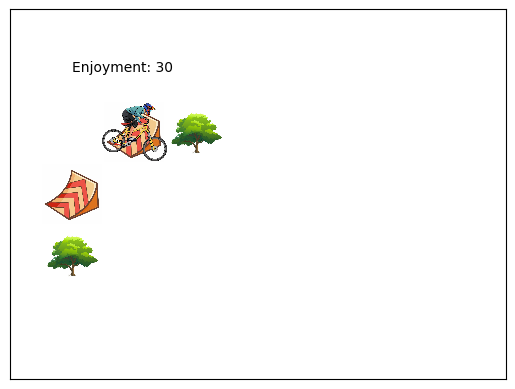

In [27]:
fig, ani = plot_game_elements(env, rand_all_positions, rand_enjoyments)
HTML(ani.to_jshtml())

## Techniques

There are many different techniques and algorithms within reinforcement learning, I will only highlight two below which appear in quite a few different places and are helpful for introducing concepts. Known as Policy gradients and Q-learning.

There are methods such as value and policy iteration which optimise the value functions and policy by iteration and dynamic programming, however, these are rarely applicable to real world problems, therefore I will mostly look at Neural Network based approaches below. These are also model free approaces, as in general we may not know the entire MDP before starting the problem.



## Q-learning 

Q-learning is a method to optimise the action-value function that we defined earlier, where the goal is to maximise the return we get at the end of the episode.

In Q-learning we are trying to maximise the action value function, this is the expectation over the return $R$ given we started in some state $s$, took some action $s$ and followed some policy $\pi$ for all the future.

$$
Q_\pi(s,a)=\mathrm{E}_{\pi}\left[G_t \mid S_t=s,\ A_t=a\right].
$$

Here we are going to model the Q value with a neural network, so it would see some state and output a probability distribution over actions.


If we let the episode run to the end, we could store all of the estimated Q values for each state and action and all of the real returns, and update our model based on how well we predicted the future return. i.e.

$$
Q(S_t, A_t) = Q(S_t, A_t) + \alpha \left(G_t - Q(S_t, A_t)\right)
$$

where alpha is a learning rate.

### TD learning

The way we actually implement this below is using Temporal differece learning (TD-learning). This allows us to start learning before an episode is complete, we dont have to wait until the end. We can use our value function to predict how well we will do in the future and update our model based on that.

We can think of this like so:
1. We are in some state S_t, the value function tells us how much return we expect to get from this state.
2. We take some action and end up in state S_{t+1}, this new state has a value function estimating how much return we get from this new state.
3. We can update out original model based on how well it predicted that return. (updating a guess towards a guess.)

So how can we write out the update to the value function above, now we dont know the true return as we have not completed the episode, however, we can still update it with an estimate of the return we get from the next update.

$$
Q(S_t, A_t) = Q(S_t, A_t) + \alpha \left(R_t + \gamma Q(S_{t+1}, A_{t+1})  - Q(S_t, A_t)\right)
$$


### Neural network updates

Now if we write the Q function as a neural network it is generally parameterised by some parameters $\theta$ ($Q_{\pi}^{\theta}(s, a)$), so we essentially want to update the parameters theta, where we update them in the direction of their derivative (gradient descent). where looking above the update is just the difference between the estimated value function and the "true" value function.

$$
Loss = \mathrm{E}_{\pi} \left[(Q_{\pi}(s, a) - Q_{\pi}^{\theta}(s, a))^2  \right]
$$

Where the "true" action-value function here is actually just our estimate of the action-value function from the next state. This is a bit like doing supervised learning on the (estimated) returns that we got.

Learning this action value function means we can then predict which is the best action to take by taking the maximum Q-value over all the actions in a given state.


In [103]:
from collections import namedtuple, deque
import random
    
# setup a simple q network 
class QNetwork(torch.nn.Module):

    def __init__(self, n_observations, n_actions):
        super(QNetwork, self).__init__()
        self.layer1 = torch.nn.Linear(n_observations, 128)
        self.layer2 = torch.nn.Linear(128, 128)
        self.layer3 = torch.nn.Linear(128, n_actions)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer1(x))
        x = torch.nn.functional.relu(self.layer2(x))
        return self.layer3(x)

# Define the experience replay buffer
# the replay buffer stores the training data for the network
# it consists of:
# the current state
# the action taken from this state
# the reward that was gained from taking that action from the state
# the state that we transitioned to by performing that action 
# whether the state was a terminal one or not
    
Experience = namedtuple('Experience', ['state', 'action', 'reward', 'next_state', 'done'])

class ReplayBuffer:
    def __init__(self, buffer_size):
        # this has a buffer of the about quantities of some desired length (usually restricted by memory)
        self.buffer = deque(maxlen=buffer_size)

    def add_experience(self, experience):
        self.buffer.append(experience)

    def sample_batch(self, batch_size):
        return random.sample(self.buffer, batch_size)

# Deep Q-Learning agent class
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.99, epsilon_start=1.0, epsilon_decay=0.995, epsilon_min=0.01, buffer_size=10000, batch_size=64):
        # environment parameters
        self.state_size = state_size
        self.action_size = action_size
        # parameters associated with the action choice probability
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        # discount factor
        self.gamma = gamma

        # Q-networks 
        self.q_network = QNetwork(state_size, action_size)
        self.target_q_network = QNetwork(state_size, action_size)
        self.target_q_network.load_state_dict(self.q_network.state_dict())
        self.target_q_network.eval()

        # Optimizer
        self.optimizer = torch.optim.AdamW(self.q_network.parameters(), lr=learning_rate)

        # Experience replay buffer
        self.replay_buffer = ReplayBuffer(buffer_size)
        self.batch_size = batch_size

    def select_action(self, state):
        # Epsilon-greedy policy
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            with torch.no_grad():
                q_values = self.q_network(torch.FloatTensor(state))
                return int(torch.argmax(q_values))

    def train(self):
        # Sample a batch from experience replay
        batch = self.replay_buffer.sample_batch(self.batch_size)

        states, actions, rewards, next_states, dones = zip(*batch)


        states = torch.FloatTensor(states).to(torch.float32)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards).to(torch.float32)
        next_states = torch.FloatTensor(next_states).to(torch.float32)
        dones = torch.FloatTensor(dones)

        # Q-values for current states
        q_values = self.q_network(states)

        # Q-values for next states using target Q-network
        next_q_values = self.target_q_network(next_states).detach()

        # Compute target Q-values
        target_q_values = rewards + self.gamma * (1 - dones) * torch.max(next_q_values, dim=1)[0]

        # Compute loss
        # this is the difference between the target qvalues and those from one step in the past
        loss = torch.nn.SmoothL1Loss()(q_values.gather(1, actions.view(-1, 1)), target_q_values.unsqueeze(1))

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(self.q_network.parameters(), 100)
        self.optimizer.step()

        # Update target Q-network periodically
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        return loss.item()

    def update_target_network(self):
        # Update target Q-network with the weights of the current Q-network
        self.target_q_network.load_state_dict(self.q_network.state_dict())

    def memorize(self, state, action, reward, next_state, done):
        # Add experience to replay buffer
        self.replay_buffer.add_experience(Experience(state, action, reward, next_state, done))


    

In [121]:
env_dqn = BikeRide((6, 4))
# you can also run this on the cart pole problem by uncommenting the line below
#env_dqn = gym.make("CartPole-v1")

In [122]:
dqn_agent = DQNAgent(np.prod(env_dqn.observation_space.shape), env_dqn.action_space.n, buffer_size=10000, learning_rate=0.5e-4)
# the agent needs slight modification of inputs for the cartpole problem as below
#dqn_agent = DQNAgent(env_dqn.observation_space.shape[0], env_dqn.action_space.n, buffer_size=10000, learning_rate=0.5e-4)

In [123]:
# set the number of games(episodes) we want it to train for
num_episodes = 2000
printdiv = num_episodes//20 # how often to pring outputs
# set some quantities to track
dqn_returns = []
dqn_losses = []
dqn_game_lengths = []
for episode in range(num_episodes):
    state, _ = env_dqn.reset()
    #popt.reset()
    done = False
    total_reward = 0
    it = 0
    while not done:
        # select the action based on the dqn model
        action = dqn_agent.select_action(torch.from_numpy(state.flatten()).unsqueeze(0).to(torch.float32))
        # take the action in the enviromnment and return next state and reward
        next_state, reward, terminated, truncated, [ ] = env_dqn.step(action)
        done = terminated or truncated

        # save the actions, rewards and states to memory
        dqn_agent.memorize(state.flatten(), action, reward, next_state.flatten(), done)

        # update the state with the new one
        state = next_state
        
        # have a little delay before training so some data can be saved to memory (can set this to batch size)
        if episode > 10:
            loss = dqn_agent.train()
        else:
            loss = 0
        
        #Place a limit on how many moves the agent can make in training
        if it > 1000:
            done = True
        # save the total reward (return)
        total_reward += reward
        it += 1
    
    dqn_game_lengths.append(it)
    dqn_returns.append(total_reward)
    dqn_losses.append(loss)

    if episode % printdiv == 0:
        print(f"Episode: {episode}, reward: {reward}, return: {total_reward}")

Episode: 0, reward: -10, return: -6
Episode: 100, reward: -10, return: 14
Episode: 200, reward: -10, return: 532
Episode: 300, reward: -10, return: 189
Episode: 400, reward: -10, return: 474
Episode: 500, reward: -10, return: 163
Episode: 600, reward: -10, return: 327
Episode: 700, reward: -10, return: 49
Episode: 800, reward: -10, return: 920
Episode: 900, reward: -10, return: 36
Episode: 1000, reward: -10, return: 434
Episode: 1100, reward: -10, return: 360
Episode: 1200, reward: -10, return: 641
Episode: 1300, reward: -10, return: 406
Episode: 1400, reward: -10, return: 486
Episode: 1500, reward: -10, return: 352
Episode: 1600, reward: 1, return: 1258
Episode: 1700, reward: -10, return: 19
Episode: 1800, reward: -10, return: 124
Episode: 1900, reward: -10, return: 83


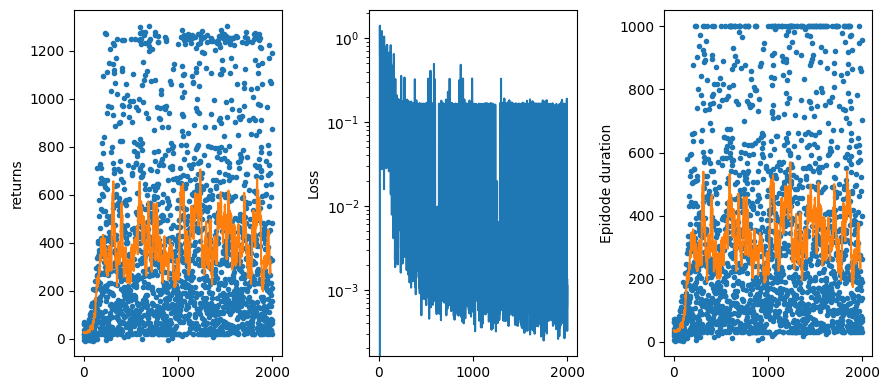

In [124]:
fig, ax = plt.subplots(ncols=3, figsize=(9,4))
window_length = 20
ax[0].plot(np.arange(len(dqn_returns)), dqn_returns, ".")
ax[0].plot(np.arange(len(dqn_returns)-window_length+1), np.convolve(dqn_returns, np.ones(window_length)/window_length, mode='valid'),)
ax[0].set_ylabel("returns")
ax[1].plot(np.arange(len(dqn_losses)), dqn_losses)
ax[1].set_yscale("log")
ax[1].set_ylabel("Loss")
ax[2].plot(np.arange(len(dqn_game_lengths)), dqn_game_lengths, ".")
ax[2].plot(np.arange(len(dqn_game_lengths)-window_length+1), np.convolve(dqn_game_lengths, np.ones(window_length)/window_length, mode='valid'),)
ax[2].set_ylabel("Epidode duration")
fig.tight_layout()
plt.show()

In [163]:
# Play a game with the trained model
# initially we reset the game to the start
dqn_state, _ = env_dqn.reset()
d = False
# set up an array to store the positions of the elements the rewards and the enjoyment
dqn_all_positions = []
dqn_rewards = []
dqn_enjoyments = []
while not d:
    # select and action using the dqn neural network
    action = dqn_agent.select_action(torch.from_numpy(dqn_state).flatten().unsqueeze(0).to(torch.float32))
    # take a step in the environment using that action
    dqn_state, r, d, _, _ = env_dqn.step(action)
    # append all the relevant quantities
    dqn_rewards.append(r)
    elements = env_dqn.get_elements()
    dqn_all_positions.append(elements)
    dqn_enjoyments.append(env_dqn.enjoyment_left)


dqn_ep_return = np.sum(dqn_rewards)

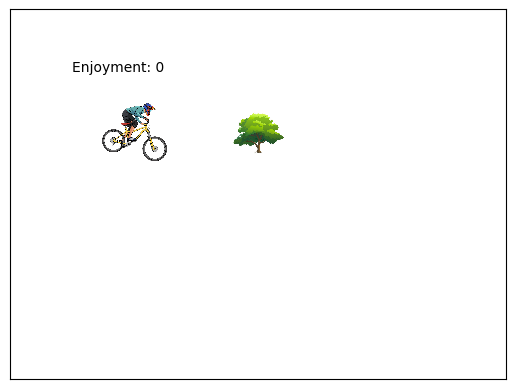

In [166]:
# plot an animate the game
fig,ani = plot_game_elements(env_dqn,dqn_all_positions,dqn_enjoyments)
HTML(ani.to_jshtml())

## Policy Gradients

Policy gradient methods compute the gradient of the loss

We want to maximise the expectation value of the return given our policy.

$$
J(\pi_{\theta}) = E_{\pi_{\theta}}(R(\tau))
$$

The goal is to find the parameters $\theta$ that maximise $J$. As we may be used to seeing within machine learning we can just update the parameters in the direction of the gradient of $J$

$$
    \theta_{k+1} = \theta_k + \alpha\nabla J(\pi_{\theta_k}) 
$$

If we know the gradient of $J$ then we can compute this (summary is below but see https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html for more details)

$$
\nabla_{\theta} J(\pi_{\theta}) = \nabla_{\theta} E \left[ R(\tau) \right] \\
= \nabla_{\theta} \int p(\tau | \theta) R(\tau) d \tau \\
=  \int \nabla_{\theta} p(\tau | \theta) R(\tau) d \tau \\
= \int p(\tau | \theta) \nabla_{\theta} \log p(\tau | \theta) R(\tau) \\
= E \left[ \log \nabla_{\theta} p(\tau | \theta) R(\tau) \right]
= E \left[ \sum_t^T \nabla_{\theta} \log \pi_{\theta}(a_t| S_t) R(\tau) \right]

$$

Now we can update out policy parameters assuming that our policy distribution is differentiable. (This is where some neural networks can be handy)




In [245]:
# define initial fully connected network
class PolicyNetwork(torch.nn.Module):

    def __init__(self, observation_size, action_size, hidden_size=32):
        super(PolicyNetwork, self).__init__()
        self.fc_1 = torch.nn.Linear(observation_size, hidden_size)
        self.fc_2 = torch.nn.Linear(hidden_size, action_size)
        self.logsoftmax = torch.nn.LogSoftmax(dim=-1)
        self.relu = torch.nn.ReLU()

    def forward(self, observation):
        output = self.relu(self.fc_1(observation))
        output = self.fc_2(output)
        return self.logsoftmax(output)
    
class PolicyOptimiser:

    def __init__(self, observation_size, action_size, hidden_size, learning_rate=0.001):
        
        # setup network and optimiser
        self.policy = PolicyNetwork(observation_size, action_size, hidden_size)
        self.optimiser = torch.optim.AdamW(self.policy.parameters(), lr=learning_rate)

        self.reset()

    def select_action(self, observation):
        """choose actions to take based on the log probabilities from the policy network
        """
        # get log probabilities
        action_log_probabilities = self.policy(observation)
        # create categorical distribution with these probabilities
        action_distribution = torch.distributions.categorical.Categorical(logits=action_log_probabilities)
        # sample from this distribution and return log probs
        return action_distribution.sample(), action_log_probabilities
    
    def update_action_rewards(self, observation, action, reward):
        self.actions.append(action)
        self.observations.append(observation)
        self.rewards.append(reward)
    
    def update_policy(self,):

        actions = torch.from_numpy(np.array(self.actions))
        rewards = torch.from_numpy(np.array(self.rewards)).to(torch.float32)
        observations = torch.from_numpy(np.array(self.observations)).to(torch.float32)

        # zero all gradients
        self.optimiser.zero_grad()

        # compute log probabilities of the observations 
        action_log_probabilities = self.policy(observations)

        # normalise rewards 
        rewards = (rewards - rewards.mean()) / (rewards.std())
    
        # compute probs for the actions taken, weight by rewards and take mean
        loss = -(action_log_probabilities.gather(1, actions.view(-1,1)) * rewards).mean()

        # update network
        loss.backward()
        self.optimiser.step()

        return loss.item()

    def reset(self):
        self.actions = []
        self.rewards = []
        self.observations = []




In [196]:
env_po = BikeRide((6, 4))

In [213]:
popt = PolicyOptimiser(np.prod(env_po.observation_shape), env.action_space.n, 128, 1e-5)

In [214]:
# initialise some variabls like number of eposides and retrns/losses
num_episodes = 10000
printdiv = num_episodes//20
po_returns = []
po_losses = []
po_game_lengths = []
# main training loop
for episode in range(num_episodes):
    # reset the environment every episode
    state, _ = env_po.reset()
    # also reset the training data saved to the policy trainer
    popt.reset()
    done = False
    it = 0
    while not done:
        # select an action from the policy network
        action, action_log_prob = popt.select_action(torch.from_numpy(state).flatten().unsqueeze(0).to(torch.float32))
        # take a step based on the action choice
        new_state, reward, done, _, [ ] = env_po.step(action[0].numpy())
        # update the training data for the policy
        popt.update_action_rewards(new_state.flatten(), action, reward)
        # dont let the number of actions in one game exceed 1000
        if it > 1000:
            done = True
        it += 1
        
    if episode % 1 == 0:
        po_game_lengths.append(it)
        po_returns.append(env_po.ep_return)
        loss = popt.update_policy()
        po_losses.append(loss)

    if episode % printdiv == 0:
        print(f"Episode: {episode}, reward: {reward}, return: {env_po.ep_return}")

Episode: 0, reward: -10, return: -3
Episode: 500, reward: -10, return: 8
Episode: 1000, reward: -10, return: 3
Episode: 1500, reward: -10, return: 26
Episode: 2000, reward: -10, return: 8
Episode: 2500, reward: -10, return: 13
Episode: 3000, reward: -10, return: 40
Episode: 3500, reward: -10, return: 37
Episode: 4000, reward: -10, return: 13
Episode: 4500, reward: -10, return: 30
Episode: 5000, reward: -10, return: 82
Episode: 5500, reward: -10, return: 3
Episode: 6000, reward: -10, return: 2
Episode: 6500, reward: -10, return: -3
Episode: 7000, reward: -10, return: 13
Episode: 7500, reward: -10, return: 5
Episode: 8000, reward: -10, return: 12
Episode: 8500, reward: -10, return: 30
Episode: 9000, reward: -10, return: 2
Episode: 9500, reward: -10, return: 52


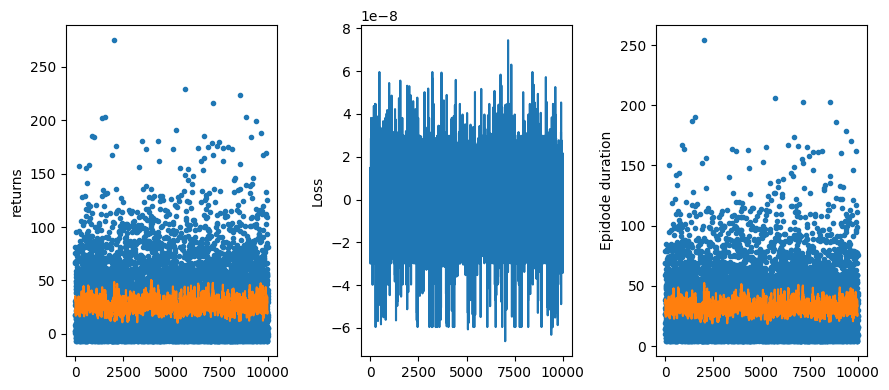

In [207]:
fig, ax = plt.subplots(ncols=3, figsize=(9,4))
window_length = 20
ax[0].plot(np.arange(len(po_returns)), po_returns, ".")
ax[0].plot(np.arange(len(po_returns)-window_length+1), np.convolve(po_returns, np.ones(window_length)/window_length, mode='valid'),)
ax[0].set_ylabel("returns")
ax[1].plot(np.arange(len(po_losses)), po_losses)
ax[1].set_ylabel("Loss")
ax[2].plot(np.arange(len(po_game_lengths)), po_game_lengths, ".")
ax[2].plot(np.arange(len(po_game_lengths)-window_length+1), np.convolve(po_game_lengths, np.ones(window_length)/window_length, mode='valid'),)
ax[2].set_ylabel("Epidode duration")
fig.tight_layout()
plt.show()

In [242]:
po_state, _ = env_po.reset()
d = False
po_all_positions = []
po_rewards = []
po_enjoyments = []
while not d:
    action, actlogprob = popt.select_action(torch.from_numpy(po_state).flatten().unsqueeze(0).to(torch.float32))
    po_state, r, d, _, _ = env_po.step(action[0].numpy())
    po_rewards.append(r)
    elements = env_po.get_elements()
    po_all_positions.append(elements)
    po_enjoyments.append(env_po.enjoyment_left)


po_ep_return = np.sum(po_rewards)

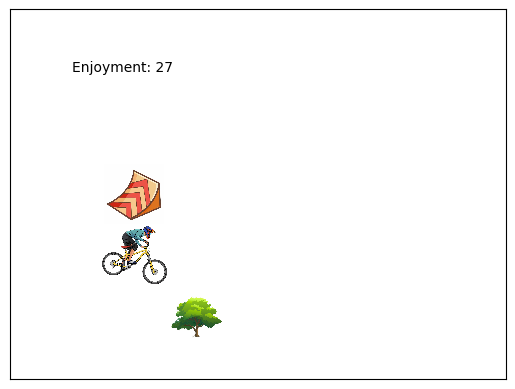

In [243]:
fig,ani = plot_game_elements(env_po,po_all_positions,po_enjoyments)
HTML(ani.to_jshtml())

# Actor-Critic methods

Try and implement an actor critic method based on the above two approaches.

Here there will be two neural networks, the Actor which predicts the probabilities of taking the next action and the Critic which will predict the Value function.
